## Obj: create principal component of the iris dataset from scratch

This notebook is a part of the series __From Scratch__, where i try to code machine learning algorithms from scratch (just numpy and math). Okay admittedly using numpy for PCA is close to cheating as it's actually really easy :p.

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import seaborn as sns

#### Loading the data

In [163]:
iris_master = load_iris()
iris = pd.DataFrame(
    data= np.hstack((iris_master['data'], iris_master['target'].reshape(-1, 1))),
    columns= iris_master['feature_names'] + ['target']
    )
iris["species"] = iris["target"].replace({0:"setosa", 1:"versicolor", 2:"virginica"})
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


#### Visualizing the variance for each features

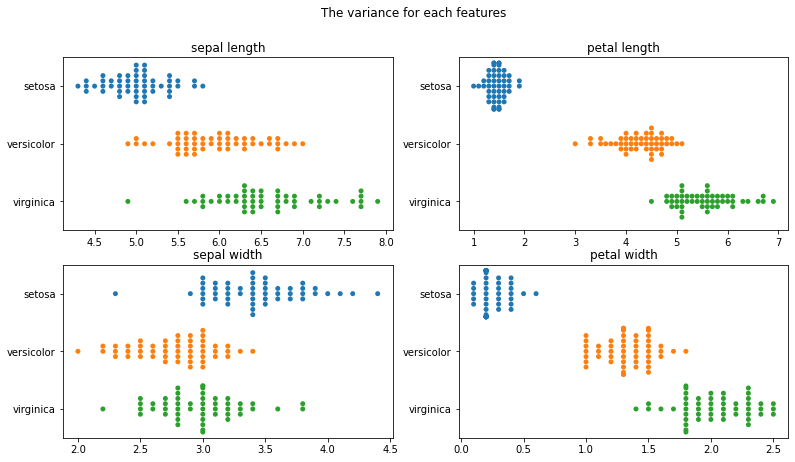

In [115]:
import warnings
warnings.filterwarnings("ignore")  # the warnings are annoying :p

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13,7))
fig.suptitle("The variance for each features")

sns.swarmplot(x="sepal length (cm)", y="species", data=iris, ax=ax[0,0])
ax[0,0].set_ylabel("")
ax[0,0].set_xlabel("")
ax[0,0].set_title("sepal length")


sns.swarmplot(x="sepal width (cm)", y="species", data=iris, ax=ax[1,0])
ax[1,0].set_ylabel("")
ax[1,0].set_xlabel("")
ax[1,0].set_title("sepal width")

sns.swarmplot(x="petal length (cm)", y="species", data=iris, ax=ax[0,1])
ax[0,1].set_ylabel("")
ax[0,1].set_xlabel("")
ax[0,1].set_title("petal length")


sns.swarmplot(x="petal width (cm)", y="species", data=iris, ax=ax[1,1])
ax[1,1].set_ylabel("")
ax[1,1].set_xlabel("")
ax[1,1].set_title("petal width")

plt.show()

#### Plotting the scree plot

In [76]:
features = iris[iris.columns[:4]].values

for this early stage, ill just use sklearn's PCA

In [103]:
pca_testing = PCA(n_components=4)  # 4 is simply the number of initial dimensions
pca_testing.fit(features)

PCA(n_components=4)

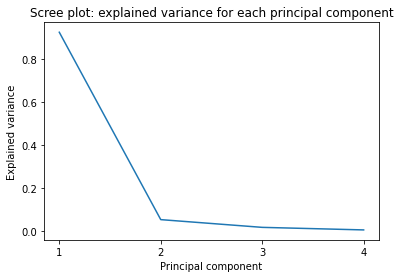

In [104]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,5), pca_testing.explained_variance_ratio_)
ax.set_xticks(np.arange(1,5))
ax.set_title("Scree plot: explained variance for each principal component")
ax.set_xlabel("Principal component")
ax.set_ylabel("Explained variance")
plt.show()

it appears that 2 principal component is the sweet spot

#### Sklearn's version

In [191]:
pca_sklearn = PCA(n_components=2, whiten=False)  # 4 is simply the number of initial dimensions
pca_sklearn.fit(features)

PCA(n_components=2)

#### Visualizing the variance of the transformed features

In [107]:
iris_transformed = pd.DataFrame(pca_sklearn.transform(features), columns=list("12"))
iris_transformed["species"]=iris["species"]

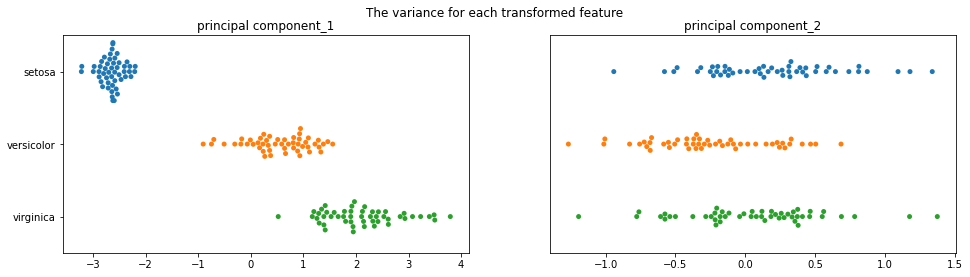

In [120]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

fig.suptitle("The variance for each transformed feature")
sns.swarmplot(x="1", y="species", data=iris_transformed, ax=ax[0])
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].set_title("principal component_1")

sns.swarmplot(x="2", y="species", data=iris_transformed, ax=ax[1])
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_yticks([])
ax[1].set_title("principal component_2")


plt.show()

#### Scatter plot for the two dimensions

With only 2 dimensions, simple scatter plot is available

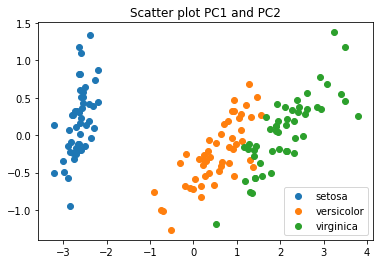

In [124]:
fig, ax = plt.subplots()

setosa = iris_transformed.loc[iris_transformed["species"]=="setosa", :]
versicolor = iris_transformed.loc[iris_transformed["species"]=="versicolor", :]
virginica = iris_transformed.loc[iris_transformed["species"]=="virginica", :]

ax.scatter(setosa["1"], setosa["2"], label="setosa")
ax.scatter(versicolor["1"], versicolor["2"], label="versicolor")
ax.scatter(virginica["1"], virginica["2"], label="virginica")

ax.set_title("Scatter plot PC1 and PC2")
ax.legend()

plt.show()


pretty good

### Now from scratch

The main idea to find the __direction__ of vector(s) that maximizes the variance when the data, $(\vec{x_1}, \vec{x_2},.., \vec{x_n})$ where $\vec{x_i}$ is an $m\times 1$ vector,  is projected into it.

$$variance = \frac{1}{n}\sum_{i=1}^{N}(u_{1}^{T}x_{i} - u_{1}^{T}\bar{x})^{2} = u_{1}^{T}\frac{1}{n}\sum_{i=1}^{N}((x_{i}-\bar{x})(x_{i}-\bar{x})^{T})u_{1} = u_{1}^{T}Su_{1}$$
where $S$ is the covariance matrix of the data. Therefore, the main objective function in PCA is 

$$f(u_{1}) = u_{1}^{T}Su_{1}$$
$$\text{while being constraint by, }$$
$$u_{1}^{T}u_{1} = 1 $$
The constraint is needed because otherwise it's gonna send $u_{1}$ to infinity. It ensures that we only care of the __direction__ of $u_{1}$. Using the langrangian, the objective function becomes
$$\mathcal{L}(u_{1}, \lambda) = u_{1}^{T}Su_{1} - \lambda(u_{1}^{T}u_{1})$$

To optimize, set the $\nabla \mathcal{L}(u_{1}=0$

$$\frac{\partial\mathcal{L}(u_{1}, \lambda)}{\partial(u_{1}, \lambda)} = 0$$
$$\iff Su_{1} = \lambda u_{1} \space \text{and} \space u_{1}^{T}u_{1} = 1$$
For L to be maximum, $u_{1}$ and $\lambda$ must be eigenvector and eigenvalue of the data respectively. But which pair of eigenvalue and eigenvector? Plugging these finding to the objective function gives:
$$u_{1}^{T}Su_{1} = u_{1}\lambda u_{1} = \lambda $$
Consequently, if $u_{1}$ and $\lambda$ are eigenvector and eigenvalue, then the objective function will be $\lambda$. Therefore, to optimize this, just pick the eigenvector with the biggest eigenvalue.

*For the next principal component, simply use the eigenvector with the second largest eigenvalue, and so on and so forth. Im too lazy to write the math here :p

In [184]:
class PCAScratch:
    
    def fit(self, X, n_components):
        arr_components = np.arange(n_components)
        
        cov_matrix = np.cov(X.T)  # finding the cov matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # finding the eig values and eig vector
        all_explained_variance = eigenvalues/eigenvalues.sum()  

        self.components = eigenvectors[:, arr_components]
        self.explained_variance = all_explained_variance[arr_components]
    
    def transform(self, X):
        return np.dot(X, self.components)

I told you it is easy :p

#### Testing process

In [187]:
PCA_scratch = PCAScratch()
PCA_scratch.fit(features, 2)
print("my principal axis:")
print(PCA_scratch.components)
print()
print("my explained variance for each axis:")
print(PCA_scratch.explained_variance)
print()
print("my transformed data (first 5)")
print(PCA_scratch.transform(features)[:5])

my principal axis:
[[ 0.36138659 -0.65658877]
 [-0.08452251 -0.73016143]
 [ 0.85667061  0.17337266]
 [ 0.3582892   0.07548102]]

my explained variance for each axis:
[0.92461872 0.05306648]

my transformed data (first 5)
[[ 2.81823951 -5.64634982]
 [ 2.78822345 -5.14995135]
 [ 2.61337456 -5.18200315]
 [ 2.75702228 -5.0086536 ]
 [ 2.7736486  -5.65370709]]


In [194]:
print("sklearn's principal axis:")
print(pca_sklearn.components_.T)
print()
print("sklearn's explained variance:")
print(pca_sklearn.explained_variance_ratio_)
print()
print("sklearn's transformed data (first 5)")
print(pca_sklearn.transform(features)[:5])

sklearn's principal axis:
[[ 0.36138659  0.65658877]
 [-0.08452251  0.73016143]
 [ 0.85667061 -0.17337266]
 [ 0.3582892  -0.07548102]]

sklearn's explained variance:
[0.92461872 0.05306648]

sklearn's transformed data (first 5)
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


yeay, i made it ;p

P.S. The difference in signs in the principal axis is practically negligible and implementation-dependent. Secondly, the difference in transformed data should be due to normalization done behind the scene by sklearn.